In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import string

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\UBL-
[nltk_data]     HO.DESKTOP-7ET3E40\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
filename = r'C:\Users\UBL-HO.DESKTOP-7ET3E40\Desktop\BAI-6A\IR\Sarcasm Detection - Feature selection\Sarcasm_Headlines_Dataset.json'

data = []
with open(filename, "r") as file:
    for line in file:
        data.append(json.loads(line))

In [4]:
df = pd.DataFrame(data)
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [5]:
df = df.drop('article_link', axis = 1)
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [7]:
df.isna().sum()

headline        0
is_sarcastic    0
dtype: int64

In [8]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [9]:
def generate_ngrams(text, n):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
    return [' '.join(ngram) for ngram in ngrams(tokens, n)]

In [10]:
ngram_polarity = {}
for n in range(1, 4):
    df[f'headline_ngrams_{n}'] = df['headline'].apply(lambda x: generate_ngrams(x, n))
    for index, row in df.iterrows():
        is_sarcastic = row['is_sarcastic']
        for ngram in row[f'headline_ngrams_{n}']:
            if len(ngram) == 0:
                continue
            if ngram not in ngram_polarity:
                ngram_polarity[ngram] = {'sarcastic': 0, 'non_sarcastic': 0}
            if is_sarcastic:
                ngram_polarity[ngram]['sarcastic'] += 1
            else:
                ngram_polarity[ngram]['non_sarcastic'] += 1

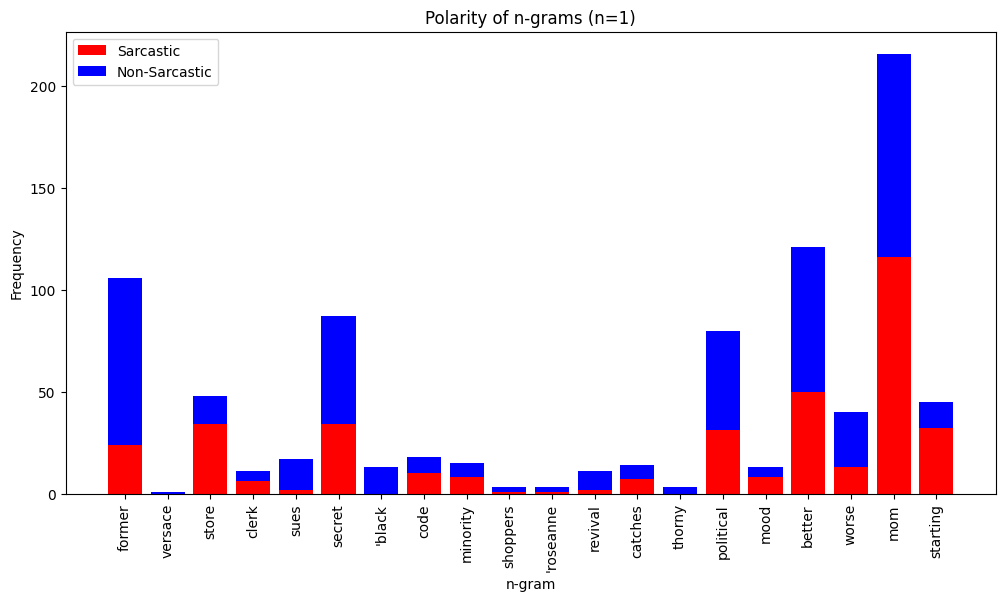

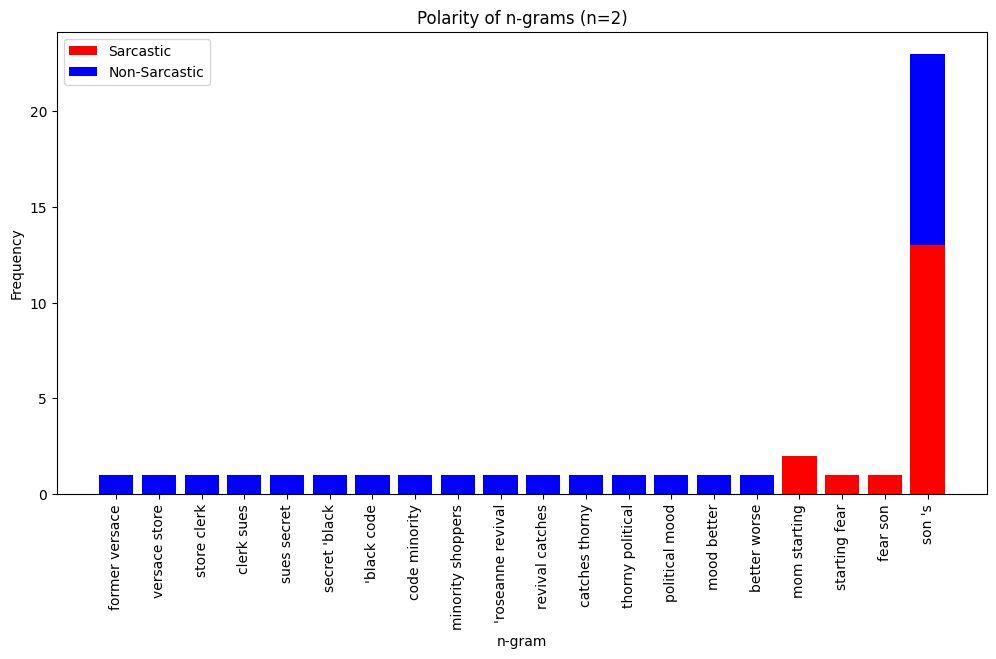

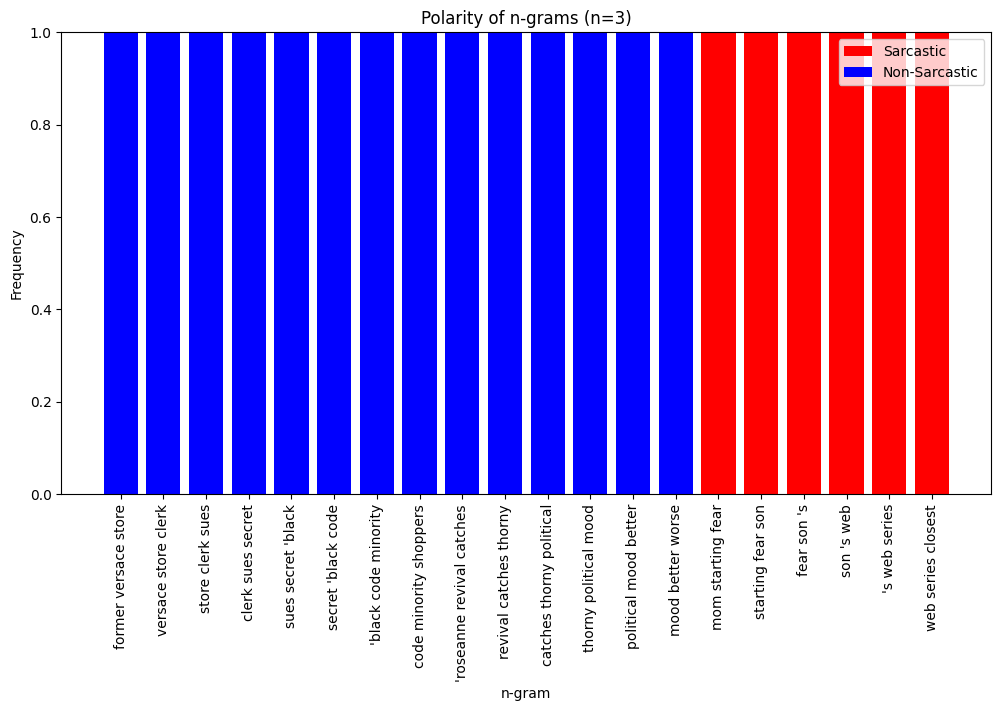

In [11]:
for n in range(1, 4):
    sarcastic_counts = []
    non_sarcastic_counts = []
    ngrams_list = []
    count = 0
    for ngram, counts in ngram_polarity.items():
        if len(ngram.split()) == n:
            ngrams_list.append(ngram)
            sarcastic_counts.append(counts['sarcastic'])
            non_sarcastic_counts.append(counts['non_sarcastic'])
            count += 1
            if count >= 20:
                break
    plt.figure(figsize=(12, 6))
    plt.bar(ngrams_list, sarcastic_counts, color='r', label='Sarcastic')
    plt.bar(ngrams_list, non_sarcastic_counts, color='b', label='Non-Sarcastic', bottom=sarcastic_counts)
    plt.xlabel('n-gram')
    plt.ylabel('Frequency')
    plt.title(f'Polarity of n-grams (n={n})')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [49]:
y = df.pop('is_sarcastic')

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(df, y, test_size=0.2, random_state=0)
# xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.1, random_state=0)

In [51]:
xtrain

,headline
26386,area ostrich lashes out against unnecessarily ...
24673,frugal star wars fan camping out in front of 9...
11086,decorative throw pillow positively aching for ...
9383,the damaging stigmas men of color in makeup face
21483,dr. scholl's introduces new cartilage inserts ...
...,...
13123,if trump praised other historic african-americ...
19648,former pennsylvania congressman sentenced to 1...
9845,rain-drenched cat announces it ready to stay i...
10799,this comedian's parenting tweets are lol-worthy


In [52]:
ytrain

26386    1
24673    1
11086    1
9383     0
21483    1
        ..
13123    0
19648    0
9845     1
10799    0
2732     0
Name: is_sarcastic, Length: 21367, dtype: int64

In [53]:
vectorizer = CountVectorizer(ngram_range=(1, 3))

In [54]:
xtrain_ngrams = vectorizer.fit_transform(xtrain)

In [55]:
feature_names = vectorizer.get_feature_names_out()

In [57]:
ngram_frequencies = xtrain_ngrams.sum(axis=0).A1

In [58]:
ngram_freq_df = pd.DataFrame({'ngram': feature_names, 'frequency': ngram_frequencies})

In [59]:
ngram_freq_df = ngram_freq_df.sort_values(by='frequency', ascending=False)

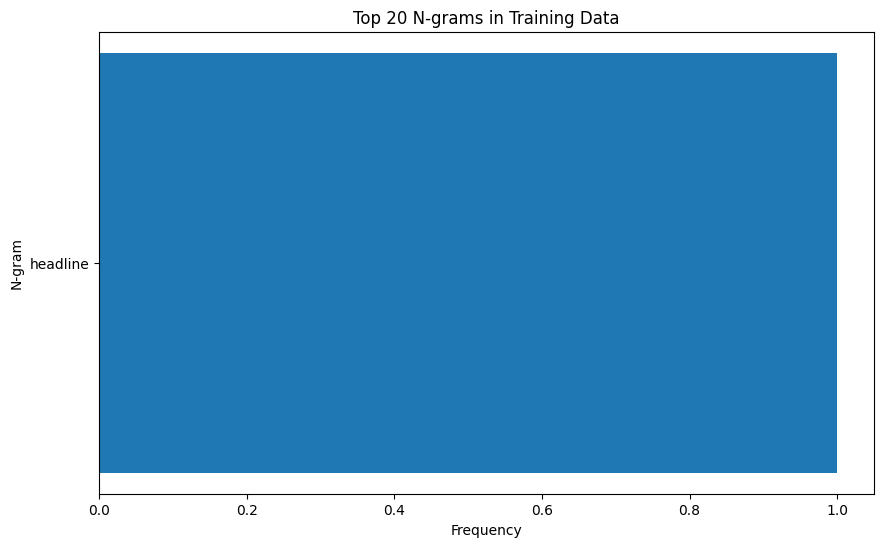

In [60]:
plt.figure(figsize=(10, 6))
plt.barh(ngram_freq_df['ngram'][:20], ngram_freq_df['frequency'][:20])
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top 20 N-grams in Training Data')
plt.gca().invert_yaxis()  
plt.show()

In [ ]:
xtest_ngrams = vectorizer.transform(xtest)